# Introduction to Machine Learning

## Term Project

In [1]:
# Data
import pandas as pd

train = pd.read_csv("npf_train.csv")
train = train.drop(["id", "date", "partlybad"], axis=1)

train['class4'] = train['class4'].map({'nonevent': 0, 'Ia': 1, 'Ib': 2, 'II': 3}).astype("category")

# class4 model
train_x = train.drop("class4", axis=1)
train_y = train['class4']

# class2 model
train_y_2 = train['class4'].apply(lambda y: 0 if y == 0 else 1).astype("category")

# test data with missing labels (unused)
test = pd.read_csv("npf_test_hidden.csv")
test_x = test.drop(["id", "date", "class4", "partlybad"], axis=1)

# Manually Listed Particle/Measurement Names (unused)
categories = ["CO2", "Glob", "H2O", "NET", "NO", "NOx", "O3", "Pamb0", "PAR", "PTG", "RGlob", "RHIRGA", "RPAR", "SO2", "SWS", "T", "UV_A", "UV_B", "CS"]

In [2]:
# TPOT Model Analysis - class4
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=75, verbosity=2, random_state=42)
tpot.fit(train_x, train_y)
print(tpot.score(train_x, train_y))
tpot.export('tpot_class4_pipeline.py')

/opt/conda/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/450 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6725274725274726

Generation 2 - Current best internal CV score: 0.6725274725274726

Generation 3 - Current best internal CV score: 0.6725274725274726

Generation 4 - Current best internal CV score: 0.6725274725274726

Generation 5 - Current best internal CV score: 0.6725274725274726

Best pipeline: ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=gini, max_features=0.15000000000000002, min_samples_leaf=5, min_samples_split=14, n_estimators=100)
0.8755458515283843


In [10]:
# TPOT Model Analysis - class2
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=75, verbosity=2, random_state=42)
tpot.fit(train_x, train_y_2)
print(tpot.score(train_x, train_y_2))
tpot.export('tpot_class2_pipeline.py')

Optimization Progress:   0%|          | 0/450 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8800286669851888

Generation 2 - Current best internal CV score: 0.8800286669851888

Generation 3 - Current best internal CV score: 0.8800286669851888

Generation 4 - Current best internal CV score: 0.8800286669851888

Generation 5 - Current best internal CV score: 0.8800286669851888

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=10, max_features=0.3, min_samples_leaf=18, min_samples_split=17, n_estimators=100, subsample=0.9500000000000001)
1.0


<ipython-input-8-3f070e135940>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


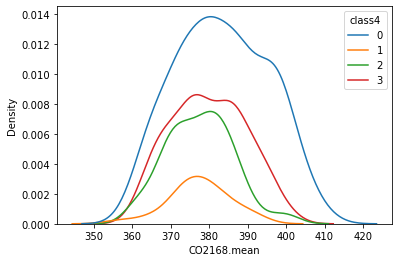

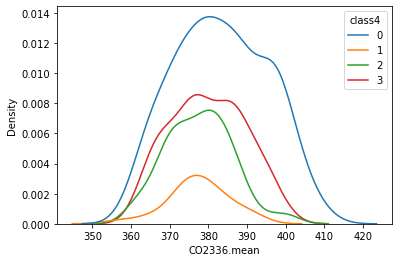

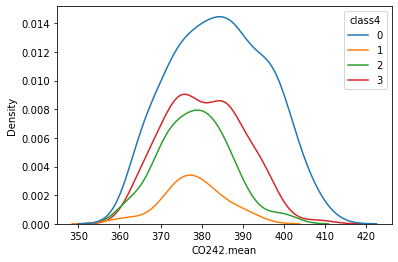

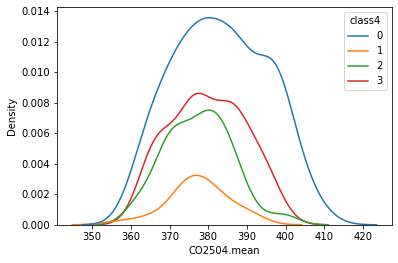

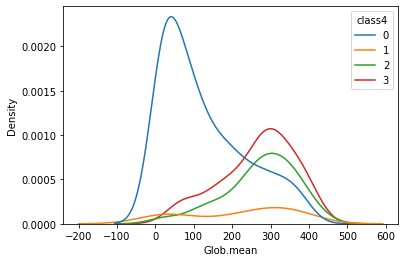

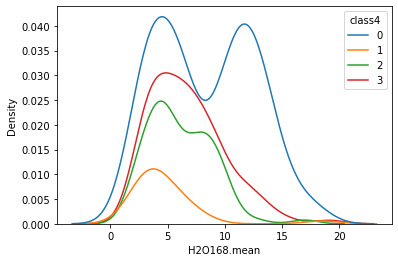

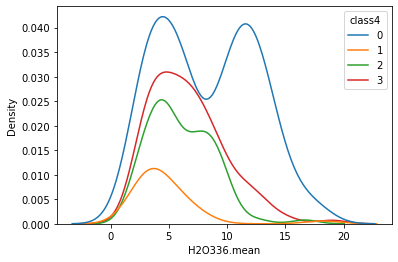

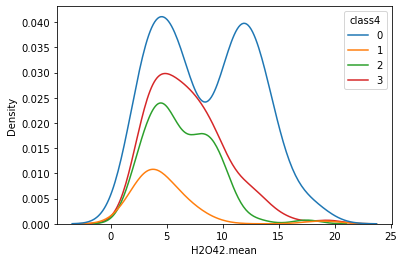

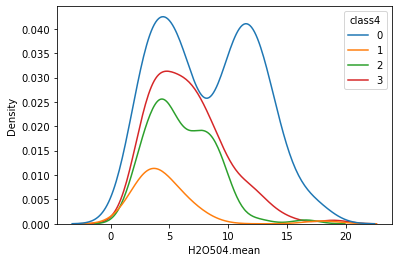

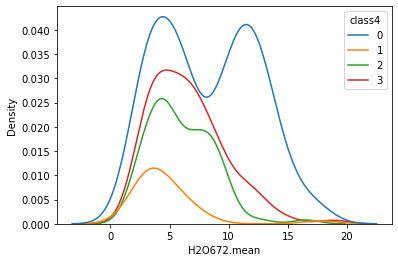

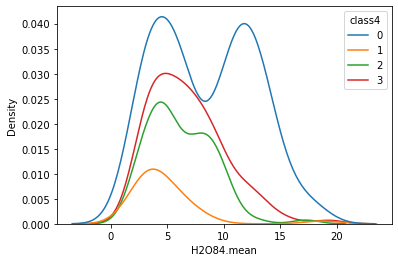

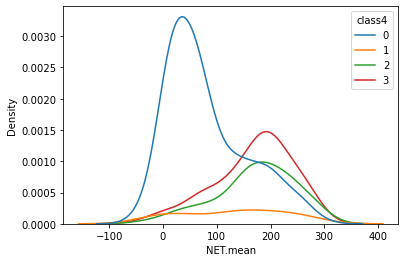

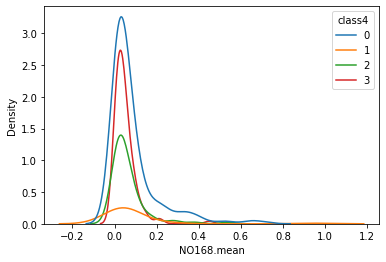

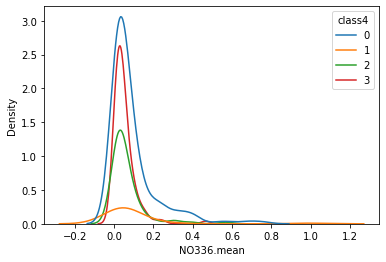

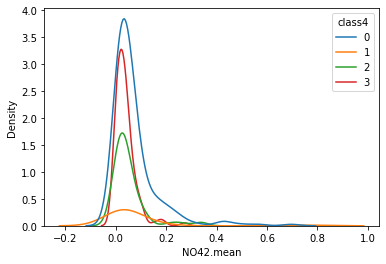

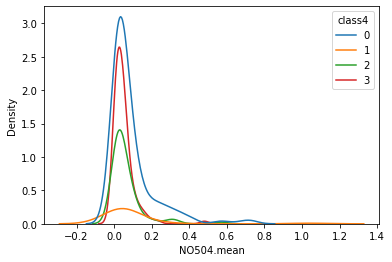

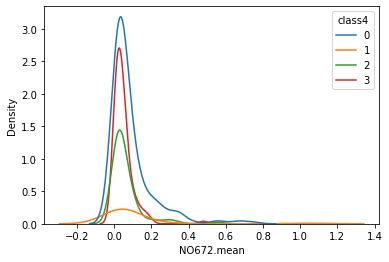

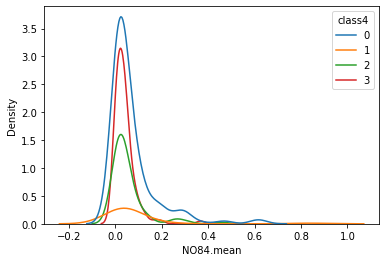

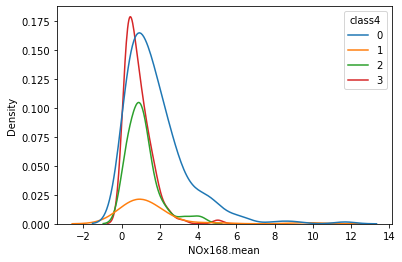

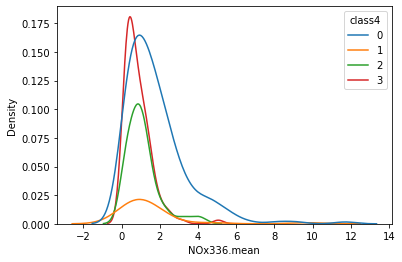

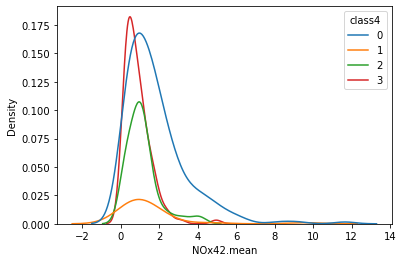

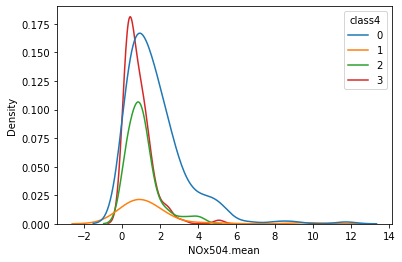

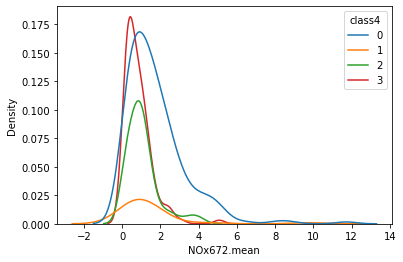

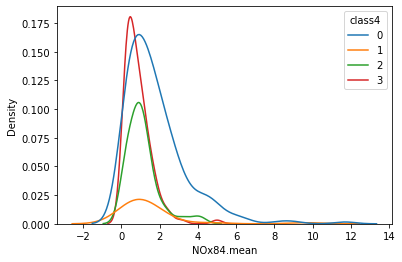

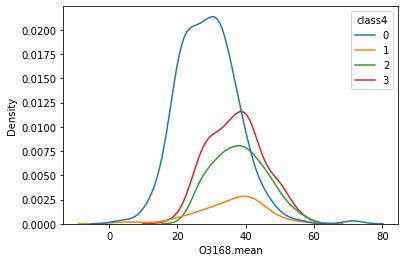

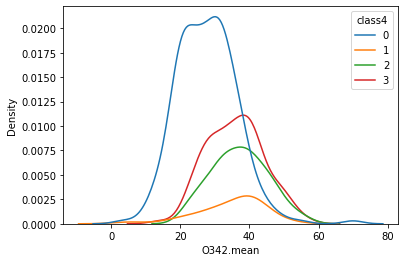

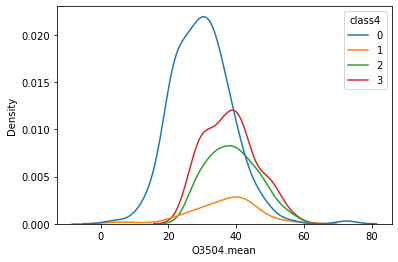

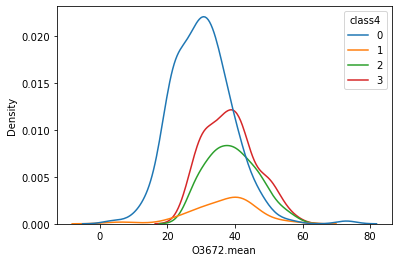

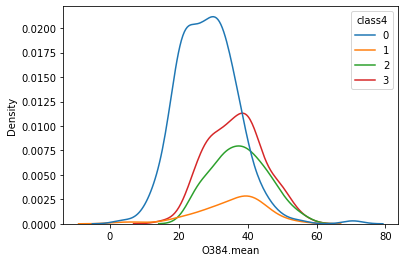

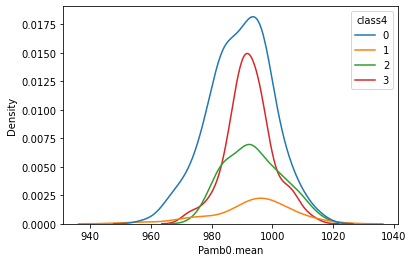

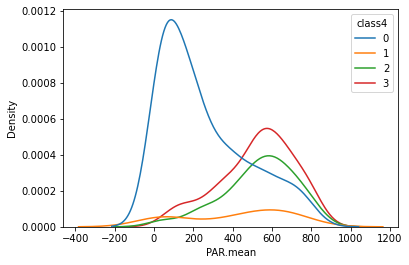

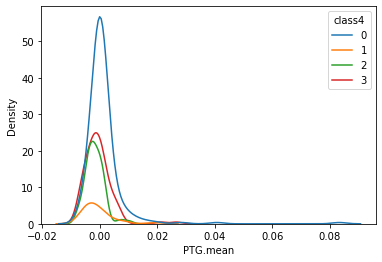

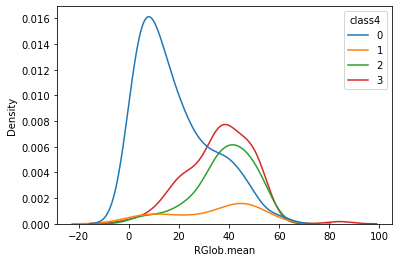

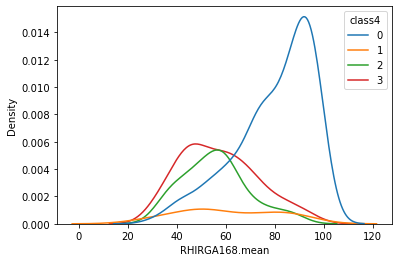

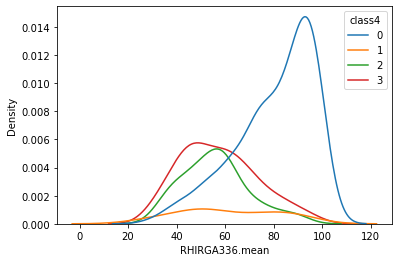

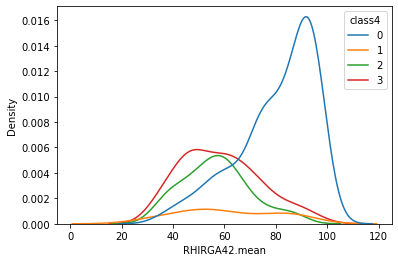

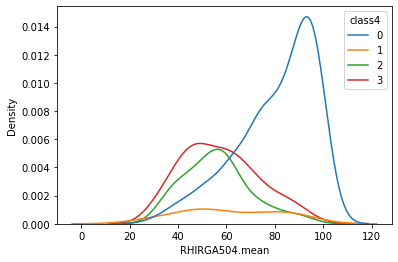

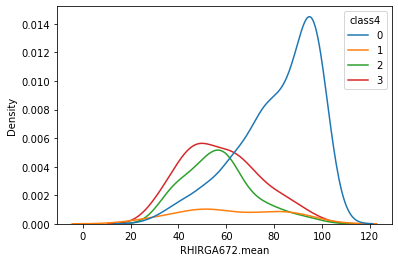

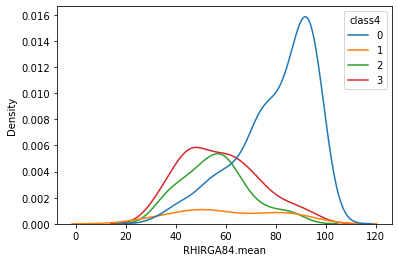

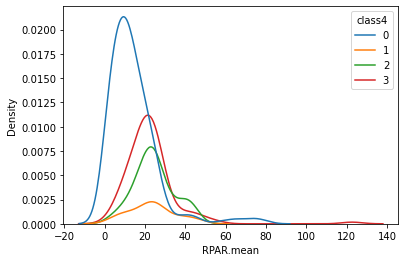

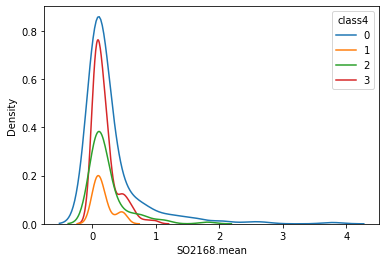

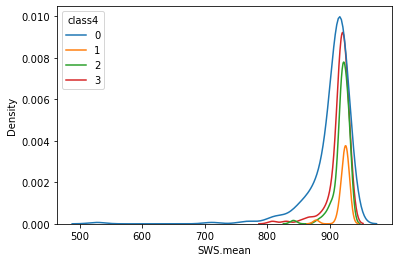

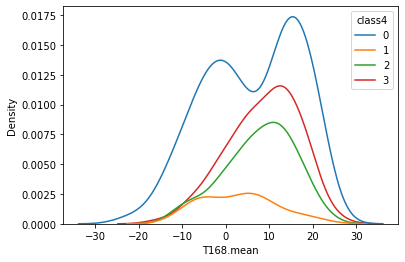

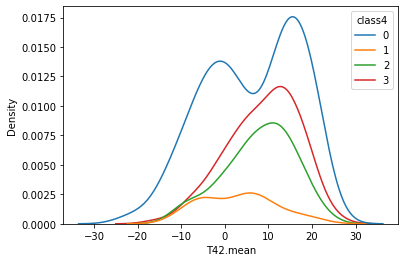

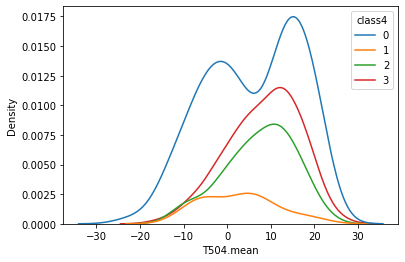

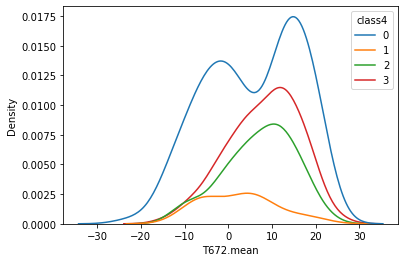

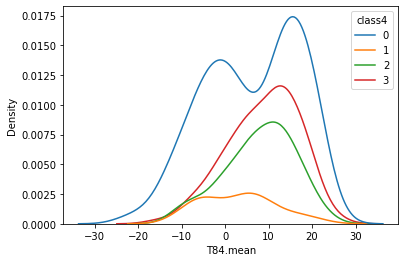

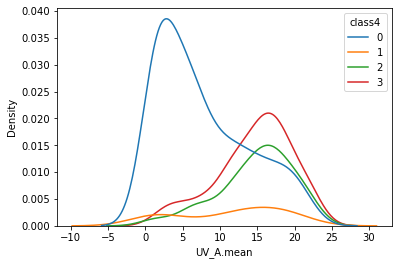

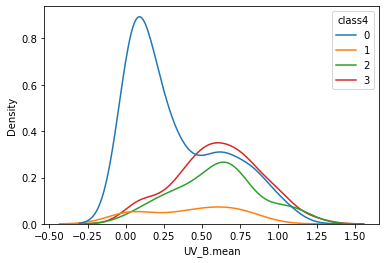

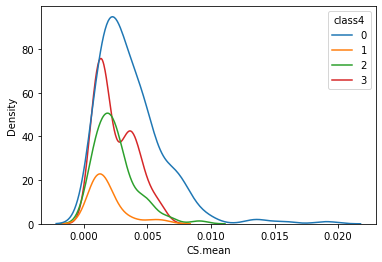

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, feature in enumerate(train_x.columns):
    if "mean" in feature:
        plt.figure(i)
        sns.kdeplot(data=train, x=feature, hue="class4")